# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

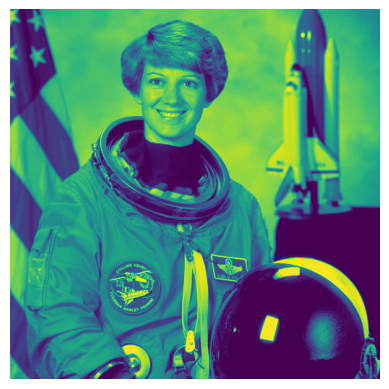

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Ensure this line is included

# Load the image
img = mpimg.imread('data/astronaut.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

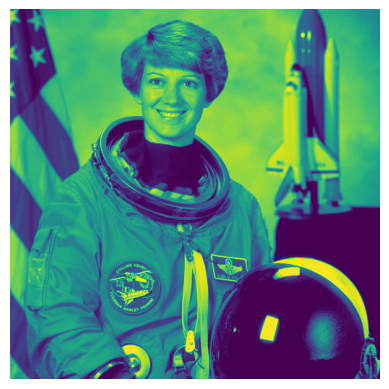

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_in = plt.imread('data/astronaut.png')

# Display the image
plt.imshow(img_in)
plt.axis('off')
plt.show()


**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [19]:
def meanfilter(img_in, size):
    # Create the result array with the same shape and type as the input
    result = np.zeros_like(img_in)
    n = (size - 1) // 2  # half the filter size

    # Handle both grayscale and color images
    if img_in.ndim == 2:  # Grayscale image
        for p in np.ndindex(img_in.shape):
            neighborhood_sum = 0
            count = 0
            
            for q in range(-n, n + 1):
                for r in range(-n, n + 1):
                    neighbor_x = p[0] + q
                    neighbor_y = p[1] + r
                    
                    if 0 <= neighbor_x < img_in.shape[0] and 0 <= neighbor_y < img_in.shape[1]:
                        neighborhood_sum += img_in[neighbor_x, neighbor_y]
                        count += 1

            result[p] = neighborhood_sum / count if count != 0 else img_in[p]

    elif img_in.ndim == 3:  # Color image
        for p in np.ndindex(img_in.shape[0], img_in.shape[1]):
            neighborhood_sum = np.zeros(img_in.shape[2])  # For summing over channels
            count = 0
            
            for q in range(-n, n + 1):
                for r in range(-n, n + 1):
                    neighbor_x = p[0] + q
                    neighbor_y = p[1] + r
                    
                    if 0 <= neighbor_x < img_in.shape[0] and 0 <= neighbor_y < img_in.shape[1]:
                        neighborhood_sum += img_in[neighbor_x, neighbor_y]
                        count += 1

            result[p] = neighborhood_sum / count if count != 0 else img_in[p]

    return result


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

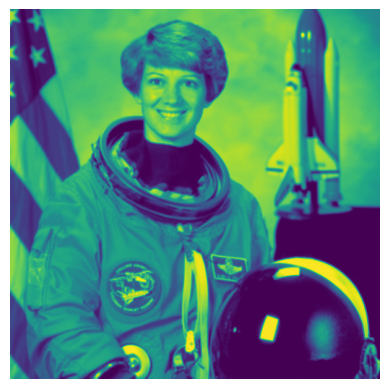

In [20]:
# Apply the mean filter with size 3
filtered_img_3 = meanfilter(img_in, 3)

# Display the filtered image
plt.imshow(filtered_img_3)
plt.axis('off')
plt.show()

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

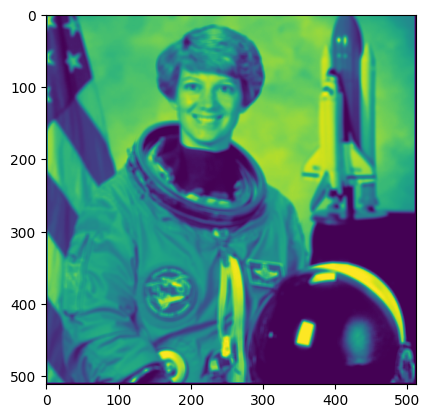

In [12]:
# Load the correct result image for comparison
correct_img5 = mpimg.imread('data/astronaut_meanfilter5.png')

plt.imshow(correct_img5 )

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [ ]:
import numpy as np

def medianfilter(img_in, size):
    # Create the result array with the same shape as the input
    result = np.zeros_like(img_in)
    n = (size - 1) // 2  # half the filter size

    # Iterate through each pixel in the image
    for p in np.ndindex(img_in.shape[0], img_in.shape[1]):
        neighborhood = []  # To store pixel values from the neighborhood 

        # Collect pixel values from the filtering neighborhood
        for q in range(-n, n + 1):
            for r in range(-n, n + 1):
                neighbor_x = p[0] + q
                neighbor_y = p[1] + r
                
                # Check if the neighbor pixel is within bounds
                if 0 <= neighbor_x < img_in.shape[0] and 0 <= neighbor_y < img_in.shape[1]:
                    neighborhood.append(img_in[neighbor_x, neighbor_y])  # Append RGB values

        # Ensure neighborhood has valid pixel data
        if len(neighborhood) > 0:
            # Convert neighborhood to a numpy array
            neighborhood = np.array(neighborhood)

            # Check if the pixel values are valid
            if neighborhood.ndim == 1:  # Only one pixel in neighborhood
                result[p] = neighborhood  # Directly use it
            else:
                # Compute the median for each channel (R, G, B)
                result[p] = np.median(neighborhood, axis=0)

    return result.astype(np.uint8)  # Return the result as an unsigned 8-bit integer


**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

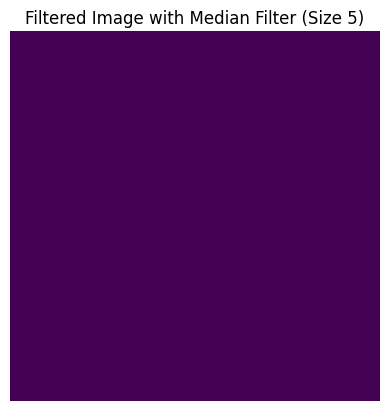

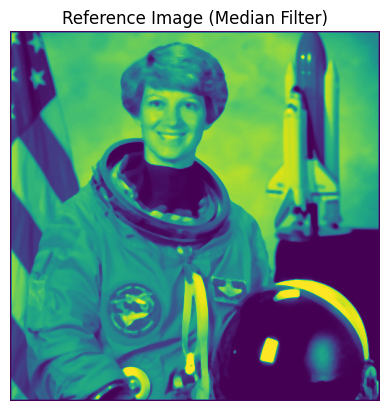

NameError: name 'neighborhood' is not defined

In [32]:
import matplotlib.pyplot as plt

# Load the color image
img_in = plt.imread('data/astronaut.png')

# Apply the median filter with size 5
filtered_img_5 = medianfilter(img_in, 5)

# Display the filtered image
plt.imshow(filtered_img_5)
plt.axis('off')  # Hide axis
plt.title('Filtered Image with Median Filter (Size 5)')
plt.show()

# Load the reference median-filtered image for comparison
img_median_ref = plt.imread('data/astronaut_medianfilter5.png')

# Display the reference image
plt.imshow(img_median_ref)
plt.axis('off')  # Hide axis
plt.title('Reference Image (Median Filter)')
plt.show()

print(neighborhood)



Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

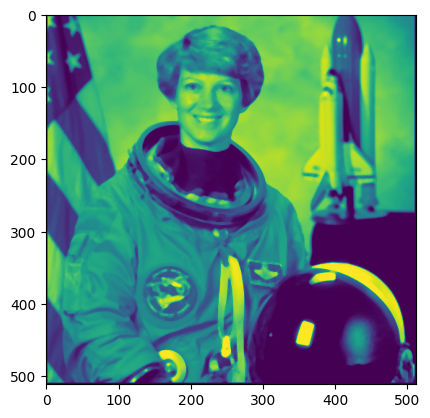

In [28]:
# Load the reference median-filtered image for comparison
img_median_ref = plt.imread('data/astronaut_medianfilter5.png')
plt.imshow(img_median_ref)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

# Load the image
img_in = plt.imread('data/astronaut.png')


**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

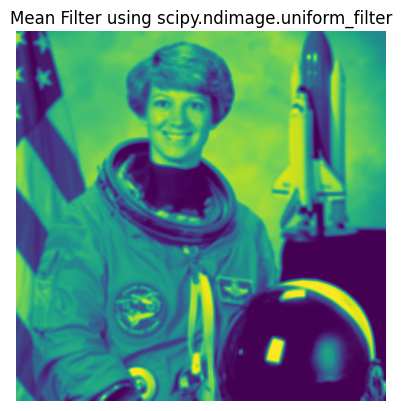

In [34]:
# Apply the uniform filter (mean filter) with size 5
mean_filtered = scipy.ndimage.uniform_filter(img_in, size=5)

# Display the mean filtered image
plt.imshow(mean_filtered)
plt.axis('off')  # Hide axis
plt.title('Mean Filter using scipy.ndimage.uniform_filter')
plt.show()


**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

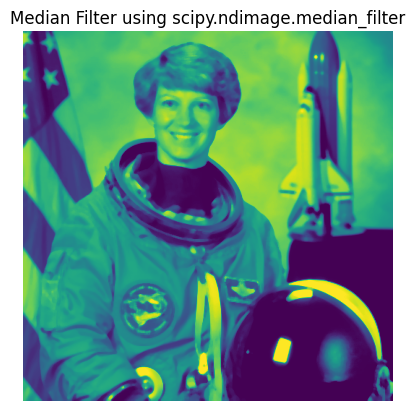

In [35]:
# Apply the median filter with size 5
median_filtered = scipy.ndimage.median_filter(img_in, size=5)

# Display the median filtered image
plt.imshow(median_filtered)
plt.axis('off')  # Hide axis
plt.title('Median Filter using scipy.ndimage.median_filter')
plt.show()


**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

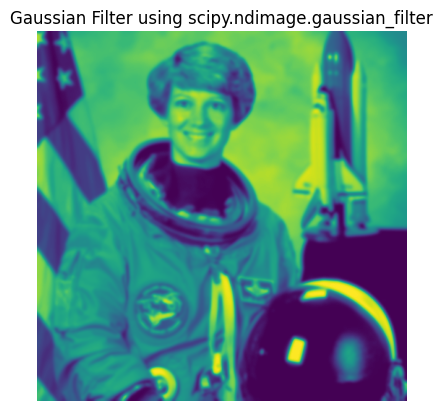

In [36]:
# Apply the Gaussian filter with a standard deviation (sigma)
sigma = 2  # You can adjust this value
gaussian_filtered = scipy.ndimage.gaussian_filter(img_in, sigma=sigma)

# Display the Gaussian filtered image
plt.imshow(gaussian_filtered)
plt.axis('off')  # Hide axis
plt.title('Gaussian Filter using scipy.ndimage.gaussian_filter')
plt.show()


**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: